In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [79]:
dataFrame = pd.read_excel("merc.xlsx")

In [80]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


mpg = How much fuel does it use in 1 mile?

#### Convert non-numeric data to numeric

In [81]:
dataFrame["transmission"].unique()

array(['Automatic', 'Manual', 'Semi-Auto', 'Other'], dtype=object)

In [82]:
transmission = {"Other": 0, "Manual": 1, "Semi-Auto": 2, "Automatic": 3}

In [83]:
dataFrame["transmission"] = dataFrame["transmission"].map(transmission)

In [84]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,3,63000,325,32.1,1.8
1,2017,34948,3,27000,20,61.4,2.1
2,2016,49948,3,6200,555,28.0,5.5
3,2016,61948,3,16000,325,30.4,4.0
4,2016,73948,3,4000,325,30.1,4.0


In [85]:
dataFrame.describe()

,year,price,transmission,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,2.257413,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,0.642056,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,0.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,2.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,2.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,3.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,3.000000,259000.000000,580.000000,217.300000,6.200000


#### is there a null value?

In [86]:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

#### which column affects how much the price?

In [87]:
dataFrame.corr()["price"].sort_values(ascending = False)

price           1.000000
year            0.520712
engineSize      0.516126
tax             0.268717
transmission    0.120248
mpg            -0.438445
mileage        -0.537214
Name: price, dtype: float64

## Data Visualization

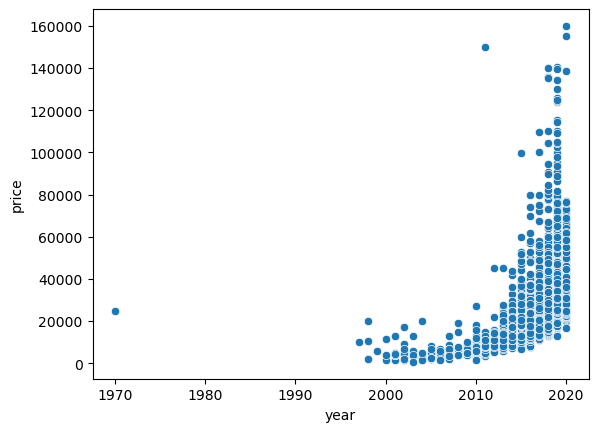

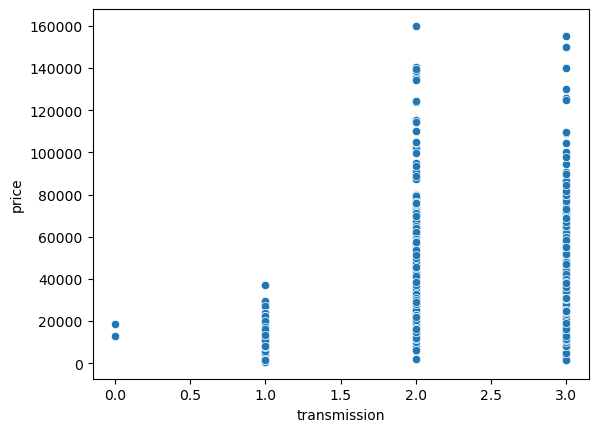

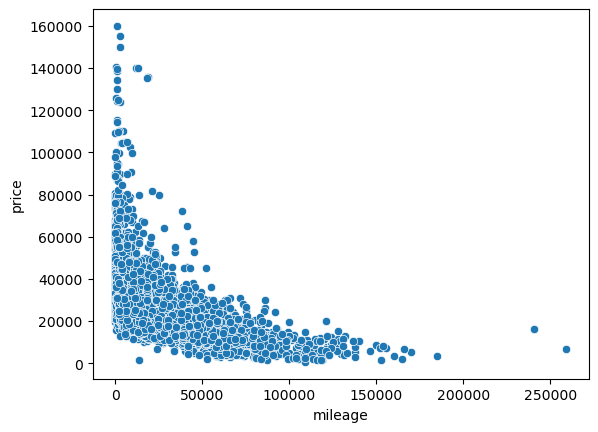

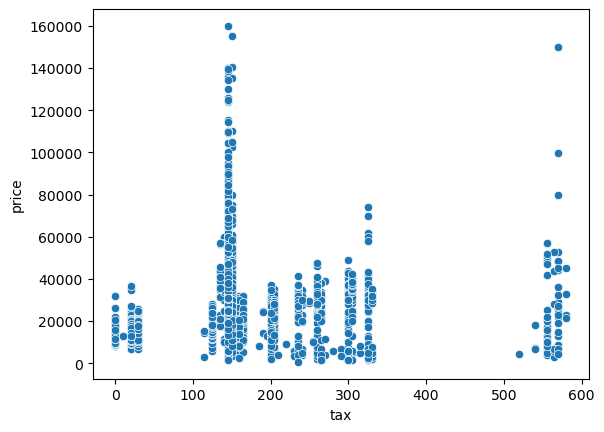

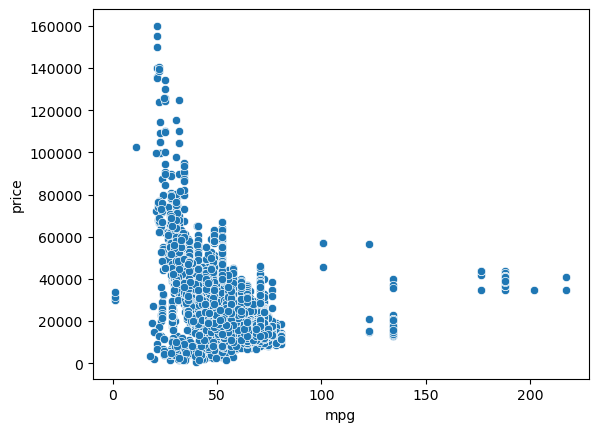

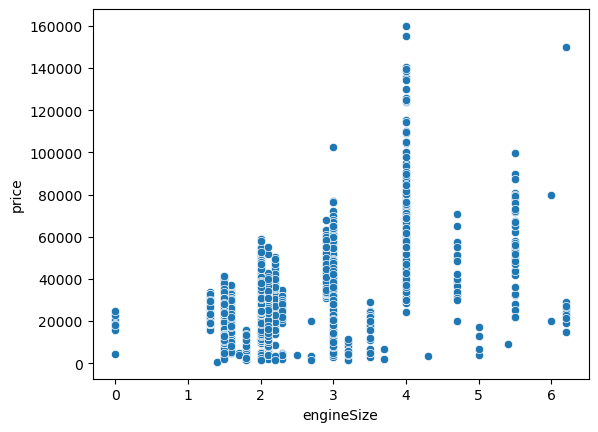

In [88]:
for column in dataFrame.columns:
    if column != "price":
        sbn.scatterplot(dataFrame, x = column, y = "price")
        plt.show()

# Data Cleaning

In [89]:
dataFrame.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [90]:
dataFrame = dataFrame[dataFrame.year != 1970]

Grafikten ve üst hücredeki kodun çıktısından da görebileceğimiz üzere 1970 yılındaki arabanın fiyat ortalaması 2018 yılındakiyle neredeyse aynı. Yani verinin bu kısmında bir farklılık var.

In [95]:
dataFrame.groupby("transmission").count()

,year,price,mileage,tax,mpg,engineSize
transmission,,,,,,
0,2,2,2,2,2,2
1,1444,1444,1444,1444,1444,1444
2,6848,6848,6848,6848,6848,6848
3,4824,4824,4824,4824,4824,4824


In [96]:
dataFrame = dataFrame[dataFrame.transmission != 0]

Grafikten ve üst hücredeki kodun çıktısından da görebileceğimiz üzere vites durumu 0 olan iki araç var ve bunlarda veride aslında sırıtan şeyler.

In [100]:
dataFrame.groupby("tax").count().head()

,year,price,transmission,mileage,mpg,engineSize
tax,,,,,,
0,172,172,172,172,172,172
10,2,2,2,2,2,2
20,1251,1251,1251,1251,1251,1251
30,989,989,989,989,989,989
115,3,3,3,3,3,3


Verginin 30 ve altında olması genel diğer verideki araçlara göre çok farklı bir durum ama böyle bir durumun olası olması ihtimaliyle bu veirye dokunmayacağım ama en son bir daha bakılabilir.

In [102]:
dataFrame.groupby("mpg").count().head()

,year,price,transmission,mileage,tax,engineSize
mpg,,,,,,
1.1,4,4,4,4,4,4
11.0,1,1,1,1,1,1
17.8,1,1,1,1,1,1
19.0,1,1,1,1,1,1
19.5,1,1,1,1,1,1


In [103]:
dataFrame = dataFrame[dataFrame.mpg > 1.1]

Grafikten ve üst hücredeki kodun çıktısından da görebileceğimiz üzere mpg de 1.1 olan 4 araç verinin diğer kısımlarına göre çok daha farklı o yüzden bu veriyi kötü etkileyebilir.

In [105]:
dataFrame.groupby("engineSize").count().head()

,year,price,transmission,mileage,tax,mpg
engineSize,,,,,,
0.0,10,10,10,10,10,10
1.3,712,712,712,712,712,712
1.4,1,1,1,1,1,1
1.5,1675,1675,1675,1675,1675,1675
1.6,843,843,843,843,843,843


In [106]:
dataFrame = dataFrame[dataFrame.engineSize > 0.0]

Grafikten ve üst hücredeki kodun çıktısından da görebileceğimiz üzere herhangi bir arabanın motor boyut litresi 0.0 olamayacağına göre bu veriyide temizlememiz gerekir.

# Price Data

Şuanda genel olarak veriyi daha güzel hale getirdik. Vergi kısmına dokunmadım ama orayada bakılabilir. Şimdi fiyat verisine bir bakalım.

<Axes: xlabel='price', ylabel='Count'>

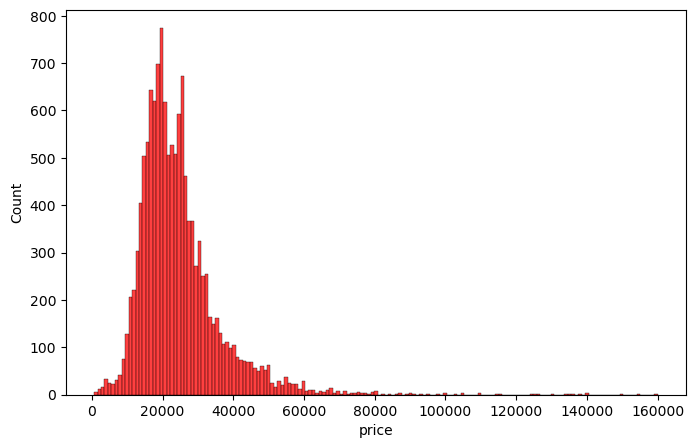

In [108]:
plt.figure(figsize = (8,5))
sbn.histplot(dataFrame["price"], color="r")

Bu görselden gördüğümüz üzere veri bi yerde toplanmış. Ama veride çok az olan ve nerdeyse 60, 80 bin den 160 bin e kadar devam eden araba fiyatlarıda var. Bu bizim verimizi kötü etkileyebilir çünkü onlar daha istisna durumlar. Ama kötü etkilemeyedebilir bu yüzden farklı bir değişkene yüksek fiaytlı verileri temizleyip iki farklı veri setiyle deneyeceğim.

In [116]:
(dataFrame.price > 70000).sum()

92

In [121]:
92 * 100 / dataFrame.price.count()

0.7021828728438406

70 bin den pahalı 92 adet araba varmış ve bu arabalar bizim asıl verimizin yüzde 0.7 sine eşit yani yüzde 1 bile değil. Yani bu verileri veri setimizden atarsak bir şey kaybetmeyiz gibi duruyor.

In [122]:
dataFrame.sort_values("price", ascending = False)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,2,1350,145,21.4,4.0
10044,2020,154998,3,3000,150,21.4,4.0
5,2011,149948,3,3000,570,21.4,6.2
8737,2019,140319,2,785,150,22.1,4.0
6386,2018,139995,2,13046,145,21.4,4.0
...,...,...,...,...,...,...,...
12594,2004,1495,1,119000,300,34.5,1.8
11549,2002,1495,3,13800,305,39.8,2.7
11765,2000,1490,3,87000,265,27.2,3.2
12008,2010,1350,1,116126,145,54.3,2.0


In [123]:
lowPriceDf = dataFrame.sort_values("price", ascending = False).iloc[92:]

Önce "price" kolonunu küçükten büyüğe sıraladık ve sonra iloc[92:] ile ilk 92 veriden sonrasını lowPriceDf'e at dedik.

<Axes: xlabel='price', ylabel='Count'>

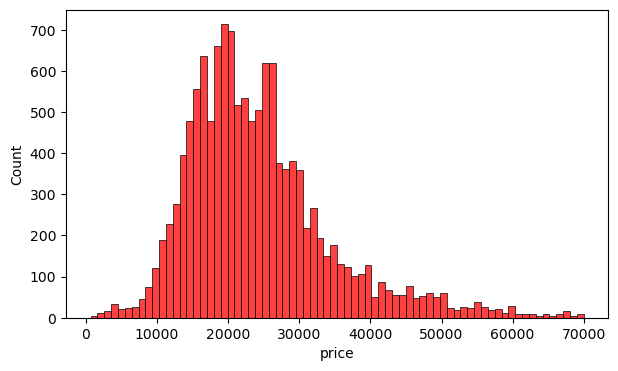

In [125]:
plt.figure(figsize = (7,4))
sbn.histplot(lowPriceDf["price"], color="r")

Görüldüğü gibi 70 bin den sonrasını çıkartınca veri daha toplu hale geldi.

In [260]:
y = dataFrame["price"]
X = dataFrame.drop("price", axis = 1)
lowY = lowPriceDf["price"]
lowX = lowPriceDf.drop("price", axis = 1)

In [148]:
from sklearn.model_selection import train_test_split

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
lowX_train, lowX_test, lowY_train, lowY_test = train_test_split(lowX, lowY, test_size = 0.2, random_state = 10)

Hedef ve özellikler olarak verileri böldük ve daha sonra train_test_split ile verileri eğitim ve test verileri olarak böldük.

In [300]:
from sklearn.preprocessing import MinMaxScaler

In [301]:
scaler = MinMaxScaler()

In [302]:
lowX_train = scaler.fit_transform(lowX_train)

In [303]:
lowX_test = scaler.transform(lowX_test)

Bu scaler kısmını hiç anlamadım.

In [152]:
from tensorflow.keras.models import Sequential # modelimizi oluşturmaya yarıyor
from tensorflow.keras.layers import Dense # katmanları oluşturuyoruz

In [291]:
model = Sequential()

model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))

model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mse")

In [292]:
model_low = Sequential()

model_low.add(Dense(12, activation = "relu"))
model_low.add(Dense(12, activation = "relu"))
model_low.add(Dense(12, activation = "relu"))
model_low.add(Dense(12, activation = "relu"))

model_low.add(Dense(1))

model_low.compile(optimizer = "adam", loss = "mse")

Tensorflow'u kullanarak modeli ve katmanları oluşturduk.

In [293]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 250, epochs = 300)

Epoch 1/300
42/42 [==============================] - 0s 2ms/step - loss: 705033024.0000 - val_loss: 631327488.0000
Epoch 2/300
42/42 [==============================] - 0s 825us/step - loss: 601255680.0000 - val_loss: 528101504.0000
Epoch 3/300
42/42 [==============================] - 0s 731us/step - loss: 532731328.0000 - val_loss: 482169888.0000
Epoch 4/300
42/42 [==============================] - 0s 745us/step - loss: 456297536.0000 - val_loss: 369321792.0000
Epoch 5/300
42/42 [==============================] - 0s 706us/step - loss: 303496160.0000 - val_loss: 188962064.0000
Epoch 6/300
42/42 [==============================] - 0s 700us/step - loss: 129577024.0000 - val_loss: 88304192.0000
Epoch 7/300
42/42 [==============================] - 0s 704us/step - loss: 91976712.0000 - val_loss: 84192272.0000
Epoch 8/300
42/42 [==============================] - 0s 734us/step - loss: 90028072.0000 - val_loss: 83540216.0000
Epoch 9/300
42/42 [==============================] - 0s 705us/step - lo

In [294]:
model_low.fit(x = lowX_train, y = lowY_train, validation_data = (lowX_test, lowY_test), batch_size = 250, epochs = 300)

Epoch 1/300
42/42 [==============================] - 0s 2ms/step - loss: 689210368.0000 - val_loss: 688104320.0000
Epoch 2/300
42/42 [==============================] - 0s 851us/step - loss: 689183808.0000 - val_loss: 688053440.0000
Epoch 3/300
42/42 [==============================] - 0s 828us/step - loss: 689080384.0000 - val_loss: 687860288.0000
Epoch 4/300
42/42 [==============================] - 0s 796us/step - loss: 688666368.0000 - val_loss: 687071680.0000
Epoch 5/300
42/42 [==============================] - 0s 786us/step - loss: 687155456.0000 - val_loss: 684473984.0000
Epoch 6/300
42/42 [==============================] - 0s 797us/step - loss: 682758976.0000 - val_loss: 677500416.0000
Epoch 7/300
42/42 [==============================] - 0s 775us/step - loss: 672084096.0000 - val_loss: 661892608.0000
Epoch 8/300
42/42 [==============================] - 0s 811us/step - loss: 650072000.0000 - val_loss: 631629312.0000
Epoch 9/300
42/42 [==============================] - 0s 812us/step

Verilerimizi modelere soktuk ve burda gördüğümüz üzere aşırı yüksek fiyatlıları çıkardığımızda oluşan veri bizim için çok daha iyi. Yani bundan sonra o veri ile devam edeceğiz.

In [295]:
kayipVerisi = pd.DataFrame(model_low.history.history)

In [296]:
kayipVerisi.head()

,loss,val_loss
0,689210368.0,688104320.0
1,689183808.0,688053440.0
2,689080384.0,687860288.0
3,688666368.0,687071680.0
4,687155456.0,684473984.0


<Axes: >

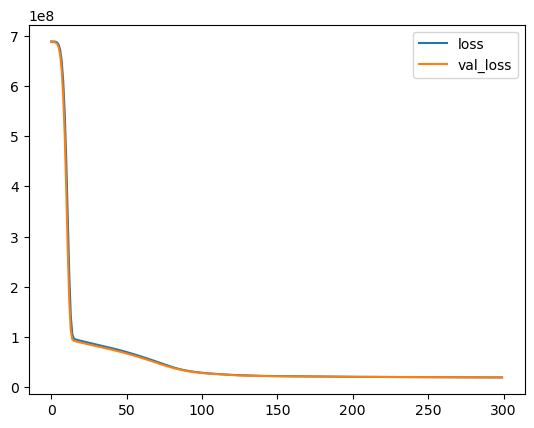

In [297]:
kayipVerisi.plot()

Bu kısmı tam anlamadım.

In [298]:
from sklearn.metrics import mean_absolute_error

In [284]:
tahmin = model_low.predict(lowX_test)

82/82 [==============================] - 0s 357us/step


In [285]:
mean_absolute_error(lowY_test, tahmin)

3083.802012456004

In [286]:
lowPriceDf.describe()

,year,price,transmission,mileage,tax,mpg,engineSize
count,13010.000000,13010.000000,13010.000000,13010.000000,13010.000000,13010.000000,13010.000000
mean,2017.291161,24210.781245,2.256264,22073.264566,129.728286,55.370269,2.058240
std,2.187588,10141.049411,0.642226,21191.522908,65.020479,15.050421,0.537812
min,1997.000000,650.000000,1.000000,1.000000,0.000000,17.800000,1.300000
25%,2016.000000,17399.000000,2.000000,6249.250000,125.000000,45.600000,1.800000
50%,2018.000000,22390.000000,2.000000,15294.500000,145.000000,56.500000,2.000000
75%,2019.000000,28800.000000,3.000000,31947.250000,145.000000,64.200000,2.100000
max,2020.000000,69995.000000,3.000000,259000.000000,580.000000,217.300000,6.200000


mae değerimiz 3 bin civarındaymış yani fiyatta ortalama 3 bin paund saçma var. Bu iyi bir değer mi bunun için ortalama fiyata bakmak gerekiyor. Ortalama fiyat 24 bin civarında yani bizim sapmamız ne iyi ne kötü durumda denilebilir. Yüzde 12'lik bir sapma mevcut.